In [4]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Defines Global Variables data entries
TOTAL_DATA = 400

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

FEATURE_NUMBER = 6

In [6]:
# Read in data
data = pd.read_csv('../DataSets/Admission_Predict.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
228,229,318,112,3,4.0,3.5,8.67,0,0.71
327,328,295,101,2,2.5,2.0,7.86,0,0.69
309,310,308,110,4,3.5,3.0,8.60,0,0.70
71,72,336,112,5,5.0,5.0,9.76,1,0.96
190,191,324,111,5,4.5,4.0,9.16,1,0.90


In [7]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)

In [8]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train = data.iloc[:TRAINING_DATA, -1].values
y_test = data.iloc[TRAINING_DATA:, -1].values

# Convert y-data into T/F - Note: "Iris-setosa" is T, rest are false
#y_train = [ele == 'Iris-setosa' for ele in y_train]
#y_test = [ele == 'Iris-setosa' for ele in y_test]

y_train = [ele > 0.7 for ele in y_train]
y_test = [ele > 0.7 for ele in y_test]

# Reshaping for matrix use (i.e. eliminates (120, ))
y_train = (np.array(y_train)).reshape(1, TRAINING_DATA)
y_test = (np.array(y_test)).reshape(1, TESTING_DATA)

In [9]:

# randomly initialize weights and biases
w = np.random.rand(1, FEATURE_NUMBER)
b = np.random.rand(1)

#w = np.array([1, 3, 4, 5])
#b = 5



In [10]:
# y_hat function gives prediction
def y_hat(weights, bias, x):
    sigmoid = (1/(1+np.exp(-(weights.dot(x) + bias))))
    return sigmoid

In [11]:
# Compute total binary cross entropy (log loss)
def log_loss(y, y_pred):
    loss = np.average(-1 * y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))
    return loss

y_pred = y_hat(w, b, x_train)
log_loss(y_train, y_pred)

0.9243704540562542

In [12]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[0]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  (1/numData) * np.sum(error)

    return gradientDict

y_pred = y_hat(w, b, x_train)
findGradients(x_train, y_train, y_pred)

{'gradWeights': array([[6.07306143],
        [9.06671667],
        [1.76070183],
        [3.47266445],
        [3.85278289],
        [5.35113284]]),
 'gradBias': 3.4046807355548463}

In [13]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        y_pred = y_hat(weights, bias, x)

        gradients = findGradients(x, y, y_pred)

        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"]).transpose())

        # Not required - meant to visualize model's performance
        loss = log_loss(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.5

    return weights, bias

In [14]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1)

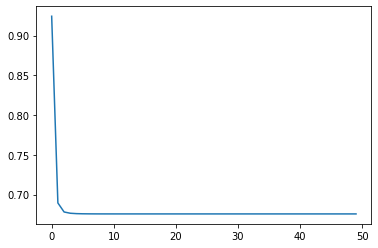

In [15]:
plt.plot(losses)

In [16]:
# Accuracy check
y_pred = y_hat(w, b, x_test)
np.sum((y_pred > 0.5) == y_test)/TESTING_DATA*100

62.5

In [17]:
#Test Comparisons
y_pred = y_hat(w, b, x_test)

pred_pos = np.sum((y_pred > 0.5) == 1)/TESTING_DATA*100
pred_neg = np.sum((y_pred > 0.5) == 0)/TESTING_DATA*100

real_pos = np.sum(y_test == 1)/TESTING_DATA*100
real_neg = np.sum(y_test  == 0)/TESTING_DATA*100


print(pred_pos)
print(pred_neg)

print(real_pos)
print(real_neg)



96.25
3.75
63.74999999999999
36.25
